In [6]:
''' 
# LLN - the number of experiment repetitions increases the avearge of the sample means
     better approximates the propulation mean
     sample(n) average --> population mean
# Monte Carlo sampling and averaging
''' 
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# simulation parameters 

population_size = 2.3e5
#print(population_size)
sample_size = 50
number_of_samples = 500


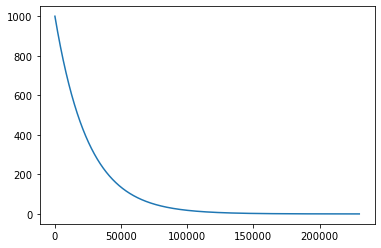

In [16]:
# 1/f distribution
#f = np.linspace(0.01,5,18)
f = np.logspace(.001,5,18)
f = np.logspace(np.log10(.001), np.log10(10), int(population_size))
#print(f)
plt.plot(1/f)
plt.show()

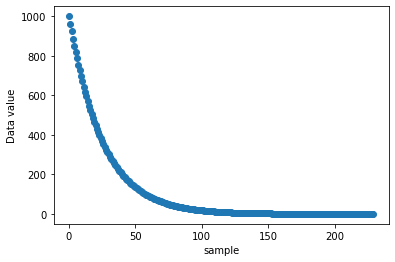

In [20]:
# generate the population of numbers
population = 1/ np.logspace(np.log10(.001), np.log10(10), int(population_size))

skip = int(1e3)
plt.plot(population[::skip], 'o')
plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

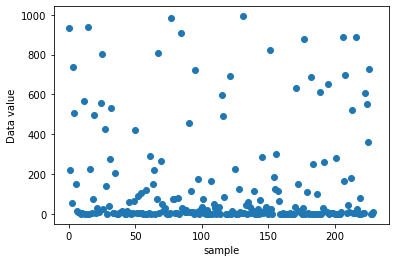

In [22]:
# shuffle the data
np.random.shuffle(population)

plt.plot(population[::skip], 'o')
plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

In [47]:
# true mean
trueMean = np.mean(population)

In [36]:
# Monte Carlo sampling = random sampling

#np.random.choice(np.array([1,2,3,4,5,6,7,9]), size=3)
np.mean(np.random.choice(population, size=sample_size))

102.34398188083296

In [42]:
samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
    #samplemeans[expi] = np.mean(np.random.choice(population, size=sample_size))
    randsample = np.random.choice(population, size=sample_size)
    samplemeans[expi] = np.mean(randsample)
    
np.mean(samplemeans)

110.87297709471899

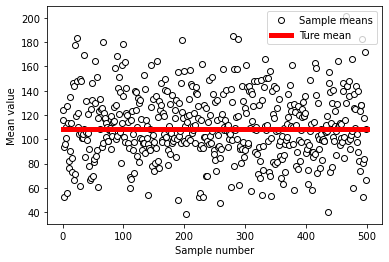

In [51]:
plt.plot(samplemeans, 'ko', markerfacecolor='w', label='Sample means')
plt.plot([0, number_of_samples], [trueMean, trueMean], 'r', linewidth=5, label='Ture mean')
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.show()

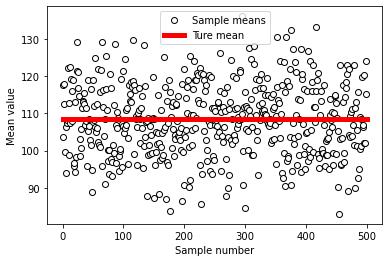

In [52]:
sample_size = 500
sample_size = 50
number_of_samples = 50

samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
    #samplemeans[expi] = np.mean(np.random.choice(population, size=sample_size))
    randsample = np.random.choice(population, size=sample_size)
    samplemeans[expi] = np.mean(randsample)
    
#np.mean(samplemeans)

plt.plot(samplemeans, 'ko', markerfacecolor='w', label='Sample means')
plt.plot([0, number_of_samples], [trueMean, trueMean], 'r', linewidth=5, label='Ture mean')
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.show()

In [76]:
# Cumulative averaging

cumave = np.zeros(number_of_samples)

#cumave[0] = samplemeans[0]
for i in range(0, number_of_samples):
    cumave[i] = np.mean(samplemeans[:i+1])
    
#cumave

In [66]:
np.mean(samplemeans[:3])
for i in range(5):
    sumx = np.sum(samplemeans[:i+1])
    avgx = sumx/(i+1)
    avg = np.mean(samplemeans[:i+1])
    print(sumx, avgx, avg)



103.72768516356113 103.72768516356113 103.72768516356113
221.3955958944994 110.6977979472497 110.6977979472497
333.8135869032147 111.27119563440489 111.27119563440489
451.7875548639714 112.94688871599286 112.94688871599286
551.3928276453045 110.2785655290609 110.2785655290609


In [81]:
np.arange(1,number_of_samples+1)
cumave2 = np.cumsum(samplemeans)/np.arange(1, number_of_samples+1)
#cumave - cumave2 < 0.000001

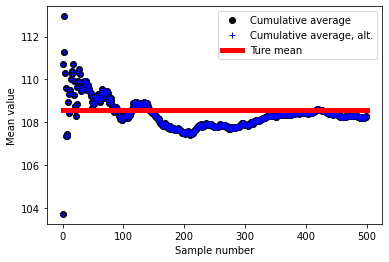

In [83]:
plt.plot(cumave, 'ko', label='Cumulative average')
plt.plot(cumave2, 'b+', label='Cumulative average, alt.')
plt.plot([0, number_of_samples], [trueMean, trueMean], 'r', linewidth=5, label='Ture mean')

plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.show()

In [103]:
number_of_meta_samples = 100
number_of_samples = 500

samplemeans = np.zeros(number_of_samples)
#cumaves = np.zeros((number_of_meta_samples, number_of_samples))
cumaves = np.zeros((number_of_samples, number_of_meta_samples))
allsamplemeans = np.zeros((number_of_samples, number_of_meta_samples))

for metai in range(number_of_meta_samples):
    for expi in range(number_of_samples):
        randsample = np.random.choice(population, size=sample_size)
        samplemeans[expi] = np.mean(randsample)
    # accumulative average divergence
    tmp = np.cumsum(samplemeans)/ np.arange(1, number_of_samples + 1)
    #cumaves[metai,:] = (tmp-trueMean)**2
    cumaves[:, metai] = (tmp-trueMean)**2
    # store the samplemeans
    allsamplemeans[:, metai] = samplemeans


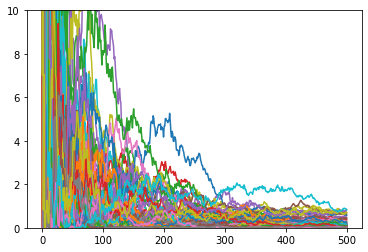

In [98]:
plt.plot(cumaves)
#plt.plot(cumaves.T)
plt.ylim([0,10])
plt.show()

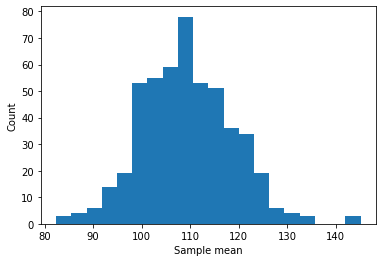

In [102]:
# Low of Large Numbers -> The Central Limit Theorem
'''
The Central Limit Theorem tells us that the distribution of sample means is going 
to be roughly Gaussian
'''

plt.hist(samplemeans, bins='fd') # Friedman-Diaonis
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

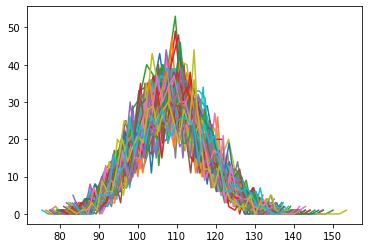

In [107]:
nbins = 40

for i in range(number_of_meta_samples):
    y, x = np.histogram(allsamplemeans[:,i], bins=nbins)
    #print(x, y)
    x = (x[1:] + x[:-1])/2 # center of boundary
    #print(x, y)

    plt.plot(x,y, )
#for i in range(number_of_meta_samples):
plt.show()
    